<a href="https://colab.research.google.com/github/SeungHyunKee/Python/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%ED%9A%8C%EA%B7%80sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 보스턴 주택가격 데이터셋

# 데이터포인트 : 506개 - 이중 404개 : 훈련샘플, 102개 : 테스트샘플
# 입력데이터에있는 각 특성(ex.범죄율)은 스케일이 서로 다름(0~1의 비율 or 1~12 or 1~100)

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
# 데이터 정규화 : 사이킷런의 패키지 가져와 써도 되지만 데이터 전처리를 하여 코드 작성
mean = train_data.mean(axis=0)
print(mean)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


데이터 정규화 시키는(스케일링) 방법
1. MinMax 스케일링 -> 데이터 범위가 0~1사이로 변경됨
2. z-정규화를 이용한standard 스케일링 -> 데이터의 평균이 0, 표준편차가 1이되도록 스케일링 함

In [6]:
# standard scaling 사용, data의 평균 = 0, 각 데이터에서 평균을 빼고 표준편차를 나눠주면된다.

train_data -= mean   # 전체 데이터의 평균값

In [7]:
# 표준편차 구하기
std = train_data.std(axis=0)  # axis = 0 인 이유 : 데이터를 표의 가로로 한줄씩 보는것이 axis=0, 세로로보는게 axis=1
                              # 하나의 데이터는 가로로 한줄이므로 컬럼별로 평균을 내기위해서는 axis=0을 해야한다

In [8]:
train_data /= std   # 표준 정규화가 되어있는 training data가 준비되어있는것

In [9]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
mean = test_data.mean(axis=0) #0번축으로 평균을 구해놓음
test_data -= mean
std = test_data.std(axis = 0)  #  표준편차(std) 구하는것, std가 0이면 모든값이 같은것 = 좋지못한 의미없는 데이터
test_data /= std   # 이렇게하면 테스트데이터도 정규화가 됨

In [11]:
test_data   
 # 이렇게되면 금액에 따라서가 아닌 비율에 따라 수치가 정해짐

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [12]:
# 신경망을 만든다.
from keras import models
from keras import layers

# 신경망을 함수로 만들어보기
def build_model() :
  model = models.Sequential()

  # 첫번째 layer 추가
  model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1], )))  # shape[1]=13=학습용데이터의 모양이 그대로 전달됨
  #input=들어오는 train(학습용)데이터모양 그대로 사용! (자동으로 input의 데이터가 지정이 됨)
  
  # 두번째 layer 추가
  model.add(layers.Dense(64, activation = 'relu'))

  # 마지막 layer
  model.add(layers.Dense(1)) # 예측한집값이 하나이기때문, regression에서 마지막 레이어는 활성함수가 없어도된다. 입력값 그대로 출력값이 된다.

  model.compile(optimizer = 'rmsprop', # 최적화하는 함수는 rmsprop 쓰기
                            loss = 'mse',   # mse = mean squared error 
                            metrics = ['mae'])  # mean absolute error
  
  return model    
  # 이 모델을 받아서 바로 활용할수있는 형태가 됨

In [13]:
#K-folder 검증  (데이터의수가 작을때 사용할수있는 방법 )   k = 데이터를 분할하는 개수

k = 4

num_val_samples = len(train_data) // k   # k = 폴더의 사이즈
 # 전체train데이터를 k로 나누기, # //k = 나머지는 버리기
all_scores = []

for i in range(k):  # k번만큼 반복하게 만들기
  print('처리중인 폴드 #',i)   # 돌아가는게 오래걸리므로 중간중간 어디쯤인지 알려주기 위함

  # 검증 데이터를 준비: k번째 분할
  # 슬라이싱 하는것(0:101)

  # 4가지 폴드로 데이터를 분할
  # 검증 훈련 훈련 훈련
  # 훈련 검증 훈련 훈련
  # 훈련 훈련 검증 훈련
  # 훈련 훈련 훈련 검증

  # 검증용 데이터 준비
  # training 데이터에서 첫번쨰 블록이 검증용 데이터가 됨
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  # 검증용데이터의 라벨값 가져오기 
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  

  # 훈련 데이터의 준비  ( 검증 데이터 양쪽에 있는 부분을 합쳐서 만든다)
  partial_train_data = np.concatenate(  # np.concatenate = 아래의 2가지 범위로 슬라이싱한것들을 합쳐줌
    # 검증데이터 기준으로 앞에있는 훈련데이터 모두
    [train_data[: i * num_val_samples],   # 처음엔 i=0에서부터 가져오므로 아무것도 안가져오게됨
   # 검증데이터 기준으로 뒤에있는 훈련데이터 모두
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  # 훈련 데이터와 마찬가지로, label데이터도 동일한 방식으로 준비
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data,
            partial_train_labels,
            epochs=20,   # 20*4, 총 80번 돌아감
            batch_size=1,
            verbose=0)  # verbose = 0을 써주면 80번 돌아가는 과정 다 안보여줌. 아래의4가지값만 보여줌
  
  val_mse, val_mae = model.evaluate(val_data, val_labels,verbose=0)
  all_scores.append(val_mae)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [14]:
all_scores   # 각 폴드의 mae 값

[1.830942153930664, 2.624541997909546, 2.6270604133605957, 2.459735631942749]

In [15]:
np.mean(all_scores)  # 폴드의 mae값의 평균

2.3855700492858887

In [16]:
# K-folder 검증, epochs값을 크게하여 더많은 학습을 하는 경우
k = 4
num_epochs = 500  # 각 폴더마다 500번씩 돌아가게함

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data,   # history라는 변수에 그때그때 값 저장하게끔 한다
              partial_train_labels,
              epochs=num_epochs,  # 폴더마다 500번 돌아가게함
              batch_size=1,
              validation_data=(val_data, val_labels),  # fit하면서 바로 검증(valdiation)을 한다
              verbose=0)

  mae_history = history.history['mae']  # 위와 다른점은 fit하고나서 history에 저장된 값을 변수로 저장
  
  all_scores.append(mae_history)  # mae_history를 전달한다, 각 epoch마다 mae가 전달된다


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [17]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

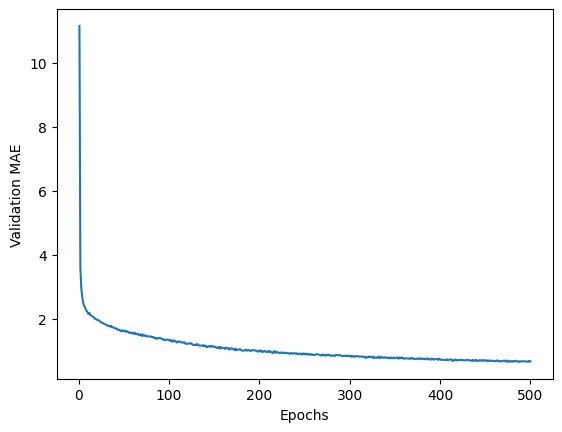

In [18]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE') 

# 4번반복한걸 평균을 낸 그림, 표를 보면 80번기준까지 값이 낮아지다가 점점 완만해진다.